# Visualization for Publication

Answering the following research questions:

* How is the increase of the density of the public fast-charging infrastructure network affecting the adoption of battery-eletric vehicles in different income classes?
* Is there a spill-over effect of local public charging infrastructure investments on the adoption of battery-electric passenger 

In [131]:
import matplotlib.pyplot as plt  
import numpy as np
import os
import sys
import pandas as pd
import geopandas as gpd
import yaml

In [132]:
def process_key(key):
    # Convert string key to a tuple
    return safe_tuple_parser(key)

def process_value(value):
    # Convert string value to float
    return float(value)

def safe_tuple_parser(key):
    """
    Safely parses string representations of nested tuples into actual Python tuples.
    Example: "(2024, (1, 7, 0), (1, 8), 2024)" -> (2024, (1, 7, 0), (1, 8), 2024)
    """
    import ast  # Abstract Syntax Tree module for safe literal evaluation

    # Remove outer quotes if present and use `ast.literal_eval`
    try:
        return ast.literal_eval(key)
    except (SyntaxError, ValueError) as e:
        raise ValueError(f"Failed to parse key: {key}") from e


In [133]:
def read_data(case_study_name, input_file_name):
    current_path = os.getcwd()
    print("Current path:", current_path)
    file_results = os.path.normpath(current_path + "/results")
    print("File results:", os.path.normpath(file_results))
    file_path = os.path.join(current_path, "/results")
    print(file_path)
    # Normalize the path
    normalized_path = os.path.normpath(file_path)
    print("Normalized path:", normalized_path)

    # reading input data 
    folder_input = os.path.normpath(current_path + "/data")
    with open(folder_input + "/" + input_file_name) as file:
        input_data = yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_n_fueling_dict.yaml")) as file:
        n_fueling_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_minus_dict.yaml")) as file:
        budget_penalty_minus_dict = yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_plus_dict.yaml")) as file:
        budget_penalty_plus_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_plus_yearly_dict.yaml")) as file:
        budget_penalty_plus_yearly_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_minus_yearly_dict.yaml")) as file:
        budget_penalty_minus_yearly_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_detour_time_dict.yaml")) as file:
        detour_time_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_f_dict.yaml")) as file:
        f_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_h_dict.yaml")) as file:
        h_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_h_exist_dict.yaml")) as file:
        h_exist_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_h_minus_dict.yaml")) as file:
        h_minus_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_h_plus_dict.yaml")) as file:
        h_plus_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_q_fuel_infr_plus_dict.yaml")) as file:
        q_fuel_infr_plus_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_q_mode_infr_plus_dict.yaml")) as file:
        q_mode_infr_plus_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_s.yaml")) as file:
        s_dict= yaml.safe_load(file)
    
    budget_penalty_minus = {process_key(key): process_value(value) for key, value in budget_penalty_minus_dict.items()}
    budget_penalty_plus = {process_key(key): process_value(value) for key, value in budget_penalty_plus_dict.items()}
    detour_time = {process_key(key): process_value(value) for key, value in detour_time_dict.items()}
    f = {process_key(key): process_value(value) for key, value in f_dict.items()}
    h = {process_key(key): process_value(value) for key, value in h_dict.items()}
    h_exist = {process_key(key): process_value(value) for key, value in h_exist_dict.items()}
    h_minus = {process_key(key): process_value(value) for key, value in h_minus_dict.items()}
    h_plus = {process_key(key): process_value(value) for key, value in h_plus_dict.items()}
    q_fuel_infr_plus = {process_key(key): process_value(value) for key, value in q_fuel_infr_plus_dict.items()}
    q_mode_infr_plus = {process_key(key): process_value(value) for key, value in q_mode_infr_plus_dict.items()}
    s = {process_key(key): process_value(value) for key, value in s_dict.items()}
    n_fueling = {process_key(key): process_value(value) for key, value in n_fueling_dict.items()}
    # detour_time = {}
    # n_fueling = {}
    output_data = {"budget_penalty_minus": budget_penalty_minus, "budget_penalty_plus": budget_penalty_plus, "detour_time": detour_time, "f": f, "h": h, "h_exist": h_exist, "h_minus": h_minus, "h_plus": h_plus, "q_fuel_infr_plus": q_fuel_infr_plus, "q_mode_infr_plus": q_mode_infr_plus, "s": s, "n_fueling": n_fueling}

    return input_data, output_data
    


## Plotting detour time 

In [134]:
case_studies = ["cs_2025-04-03_11-11-55", "cs_2025-04-03_11-23-29", "cs_2025-04-03_09-52-20"]
# case_studies = ["cs_2025-04-03_09-52-20", "cs_2025-04-03_11-23-29", "cs_2025-03-27_11-00-01"]
input_file_name = "transport_data_years_v85_densification_focused.yaml"
case_study_output = {}
case_study_input = {}
for cs in case_studies:
    input_data, output_data = read_data(cs, input_file_name)
    case_study_output[cs] = output_data
    case_study_input[cs] = input_data


Current path: c:\Github\iDesignRES_transcompmodel\examples\Basque country
File results: c:\Github\iDesignRES_transcompmodel\examples\Basque country\results
c:/results
Normalized path: c:\results
Current path: c:\Github\iDesignRES_transcompmodel\examples\Basque country
File results: c:\Github\iDesignRES_transcompmodel\examples\Basque country\results
c:/results
Normalized path: c:\results
Current path: c:\Github\iDesignRES_transcompmodel\examples\Basque country
File results: c:\Github\iDesignRES_transcompmodel\examples\Basque country\results
c:/results
Normalized path: c:\results


In [135]:
detour_times_at_edge = {}
detour_times_by_fuel = {}
infrastructure_expansion = {}
fueled_energy = {}
fueled_other_energy = {}
stock_of_fueling_there = {}
load_factor = {}
mode_shift = {}
travel_times_T = {}
detouring_times_T = {}
fueling_times_T = {}
fueling_times_entoure_T = {}
waiting_time_T = {}
total_h_fs_allfuels = {}
total_h_fs = {}
total_h_fs_share = {}
modal_shift_split_fs = {}
fueled_energy_fossil = {}
travel_times_per_fs = {}

model_parameters = input_data["Model"]
gamma = model_parameters["gamma"]
Y = model_parameters["Y"]
investment_period = model_parameters["investment_period"]
# investment_period = 1
y_init = model_parameters["y_init"]
pre_y = model_parameters["pre_y"]
product_list = input_data["Product"]
odpair_list = input_data["Odpair"]
path_list = input_data["Path"]
techvehicle_list = input_data["TechVehicle"]
fuel_list = input_data["Fuel"]
geometric_element_list = input_data["GeographicElement"]
technology_list = input_data["Technology"]
mode_list = input_data["Mode"]
financial_status = input_data["FinancialStatus"]
speed_list = input_data["Speed"]
vehicle_list = input_data["Vehicletype"]

odpair_list_dict = {item["id"]: item for item in odpair_list}
techvehicle_list_dict = {item["id"]: item for item in techvehicle_list}
product_list_dict = {item["id"]: item for item in product_list}
path_list_dict = {item["id"]: item for item in path_list}
fuel_list_dict = {item["id"]: item for item in fuel_list}
geometric_element_list_dict = {item["id"]: item for item in geometric_element_list}
technology_list_dict = {item["id"]: item for item in technology_list}
mode_list_dict = {item["id"]: item for item in mode_list}
financial_status_dict = {item["id"]: item for item in financial_status}
speed_list_dict = {item["region_type"]: item for item in speed_list}
vehicle_list_dict = {item["name"]: item for item in vehicle_list}
# excluding fs 
# fs_exclude = ["Commercial"]
fs_exclude = []
G = pre_y + Y
g_init = y_init - pre_y
Y_end = y_init + Y - 1
Y_disp = 2040
geom_id = 12
fuel_id = 2
for cs in case_studies:
    detour_time = case_study_output[cs]["detour_time"]
    n_fueling = case_study_output[cs]["n_fueling"]
    q_fuel_infr_plus = case_study_output[cs]["q_fuel_infr_plus"]
    h = case_study_output[cs]["h"]
    s = case_study_output[cs]["s"]
    f = case_study_output[cs]["f"]
    for y in range(y_init, Y_end + 1):
        detour_times_sum = sum([detour_time[(y, (p, r, odpair_list_dict[r]["path_id"], geom_id), fuel_id)] for r in odpair_list_dict.keys() for p in product_list_dict.keys() if (y, (p, r, odpair_list_dict[r]["path_id"], geom_id), 1) in detour_time.keys() and not odpair_list_dict[r]["financial_status"] in fs_exclude] )    
        n_fueling_sum = sum([n_fueling[(y, (p, r, odpair_list_dict[r]["path_id"], geom_id), fuel_id)] for r in odpair_list_dict.keys() for p in product_list_dict.keys() if (y, (p, r, odpair_list_dict[r]["path_id"], geom_id), 1) in n_fueling.keys() and not odpair_list_dict[r]["financial_status"] in fs_exclude])    

        for f_id in [1, 2]:
            detour_times_by_fuel[(cs, y, f_id)] = sum([detour_time[(y, (p, r, odpair_list_dict[r]["path_id"], geom_id), f_id)] for r in odpair_list_dict.keys() for p in product_list_dict.keys() if (y, (p, r, odpair_list_dict[r]["path_id"], geom_id), f_id) in detour_time.keys() and not odpair_list_dict[r]["financial_status"] in fs_exclude])

        if n_fueling_sum > 0:
            detour_times_at_edge[(cs, y, fuel_id)] = detour_times_sum/n_fueling_sum
        else:
            detour_times_at_edge[(cs, y, fuel_id)] = 0
        
        q_fuel_infr_plus_sum = sum(q_fuel_infr_plus[(y0, fuel_id, geom_id)] for y0 in np.arange(y_init, y+1, investment_period) if (y0, fuel_id, geom_id) in q_fuel_infr_plus.keys())
        infrastructure_expansion[(cs, y)] = q_fuel_infr_plus_sum

        total_s_sum = sum([s[(y, (1, r, odpair_list_dict[r]["path_id"], geom_id), tv)] for r in odpair_list_dict.keys() for tv in techvehicle_list_dict.keys() if (y, (1, r, odpair_list_dict[r]["path_id"], geom_id), tv) in s.keys() and technology_list_dict[techvehicle_list_dict[tv]["technology"]]["fuel"] == fuel_list_dict[fuel_id]["name"] and not odpair_list_dict[r]["financial_status"] in fs_exclude] )
        fueled_energy[(cs, y)] = total_s_sum
        total_s_sum_other = sum([s[(y, (1, r, odpair_list_dict[r]["path_id"], geom_id), tv)] for r in odpair_list_dict.keys() for tv in techvehicle_list_dict.keys() if (y, (1, r, odpair_list_dict[r]["path_id"], geom_id), tv) in s.keys() and technology_list_dict[techvehicle_list_dict[tv]["technology"]]["fuel"] != fuel_list_dict[fuel_id]["name"] and not odpair_list_dict[r]["financial_status"] in fs_exclude])
        fueled_other_energy[(cs, y)] = total_s_sum_other
        
        for fs in financial_status_dict.keys():
            if not fs in []:
                fs_name = financial_status_dict[fs]["name"]
                fueled_energy_fossil[(cs, y, fs)] = sum(s[(y, (1, r, odpair_list_dict[r]["path_id"], geom_id), tv)] for r in odpair_list_dict.keys() for tv in techvehicle_list_dict.keys() if (y, (1, r, odpair_list_dict[r]["path_id"], geom_id), tv) in s.keys() and fs_name == odpair_list_dict[r]["financial_status"] and technology_list_dict[techvehicle_list_dict[tv]["technology"]]["fuel"] != fuel_list_dict[fuel_id]["name"])
        
        total_h = sum([h[(y, r, tv_id, g)] for r in odpair_list_dict.keys() for tv_id in techvehicle_list_dict.keys() for g in range(g_init, y + 1) if (y, r, tv_id, g) in h.keys() and geom_id in path_list_dict[odpair_list_dict[r]["path_id"]]["sequence"] and technology_list_dict[techvehicle_list_dict[tv_id]["technology"]]["fuel"] == fuel_list_dict[fuel_id]["name"] and not odpair_list_dict[r]["financial_status"] in fs_exclude])
        stock_of_fueling_there[(cs, y)] = total_h
        if q_fuel_infr_plus_sum > 0:
            load_factor[(cs, y)] = total_s_sum/(q_fuel_infr_plus_sum * 365 * 24) * 100
        else:
            load_factor[(cs, y)] = 0

        for m in mode_list_dict.keys():
            f_pkm = sum(f[(y, (p, r, odpair_list_dict[r]["path_id"]), (m, tv), g)] * path_list_dict[odpair_list_dict[r]["path_id"]]["length"] for p in product_list_dict.keys() for r in odpair_list_dict.keys() for tv in range(0, 17) for g in range(g_init, y + 1) if (y, (p, r, odpair_list[r]["path_id"]), (m, tv), g) in f.keys() and not odpair_list_dict[r]["financial_status"] in fs_exclude)
            mode_shift[(cs, y, m)] = f_pkm
        
        for fs in financial_status_dict.keys():
            fs_name = financial_status_dict[fs]["name"]
            f_pkm_total = sum(f[(y, (p, r, odpair_list_dict[r]["path_id"]), (m, tv), g)] * path_list_dict[odpair_list_dict[r]["path_id"]]["length"] for m in mode_list_dict.keys() for p in product_list_dict.keys() for r in odpair_list_dict.keys() for tv in range(0, 17) for g in range(g_init, y + 1) for m in mode_list_dict.keys() if (y, (p, r, odpair_list[r]["path_id"]), (m, tv), g) in f.keys() and fs_name == odpair_list_dict[r]["financial_status"])
            f_pkm = sum(f[(y, (p, r, odpair_list_dict[r]["path_id"]), (1, tv), g)] * path_list_dict[odpair_list_dict[r]["path_id"]]["length"] for p in product_list_dict.keys() for r in odpair_list_dict.keys() for tv in range(0, 17) for g in range(g_init, y + 1) if (y, (p, r, odpair_list[r]["path_id"]), (1, tv), g) in f.keys() and fs_name == odpair_list_dict[r]["financial_status"])
            travel_time = sum(f[(y, (p, r, odpair_list_dict[r]["path_id"]), (1, tv), g)] * path_list_dict[odpair_list_dict[r]["path_id"]]["length"] * (1/speed_list_dict[odpair_list_dict[r]["region_type"]]["travel_speed"]) for p in product_list_dict.keys() for r in odpair_list_dict.keys() for tv in range(0, 17) for g in range(g_init, y + 1) if (y, (p, r, odpair_list[r]["path_id"]), (1, tv), g) in f.keys() and fs_name == odpair_list_dict[r]["financial_status"])
            travel_times_T[(cs, y, fs)] = travel_time

            travel_time += sum(f[(y, (p, r, odpair_list_dict[r]["path_id"]), (1, tv), g)] * mode_list_dict[m]["waiting_time"][y-2020] for m in mode_list_dict.keys()  for p in product_list_dict.keys() for r in odpair_list_dict.keys() for tv in range(0, 17) for g in range(g_init, y + 1) if (y, (p, r, odpair_list[r]["path_id"]), (1, tv), g) in f.keys() and fs_name == odpair_list_dict[r]["financial_status"] and m == vehicle_list_dict[techvehicle_list_dict[tv]["vehicle_type"]]["mode"])
            
            waiting_time_T[(cs, y, fs)] = sum(f[(y, (p, r, odpair_list_dict[r]["path_id"]), (1, tv), g)] * mode_list_dict[m]["waiting_time"][y-2020] for m in mode_list_dict.keys()  for p in product_list_dict.keys() for r in odpair_list_dict.keys() for tv in range(0, 17) for g in range(g_init, y + 1) if (y, (p, r, odpair_list[r]["path_id"]), (1, tv), g) in f.keys() and fs_name == odpair_list_dict[r]["financial_status"] and m == vehicle_list_dict[techvehicle_list_dict[tv]["vehicle_type"]]["mode"])
            # travel_time = sum(f[(y, (p, r, odpair_list_dict[r]["path_id"]), (m, tv), g)] for m in mode_list_dict.keys() for p in product_list_dict.keys() for r in odpair_list_dict.keys() for tv in range(0, 17) for g in range(g_init, y + 1) if (y, (p, r, odpair_list[r]["path_id"]), (m, tv), g) in f.keys() and fs_name == odpair_list_dict[r]["financial_status"])
            detouring_times_T[(cs, y, fs)] = 0
            for f_id in [1, 2]:
                n_fuel_sum = sum(n_fueling[(y, (p, r, odpair_list_dict[r]["path_id"], geom_id), f_id)] for p in product_list_dict.keys() for r in odpair_list_dict.keys() if (y, (p, r, odpair_list_dict[r]["path_id"], geom_id), f_id) in detour_time.keys() and fs_name == odpair_list_dict[r]["financial_status"])
                # if n_fuel_sum > 0:
                detouring_times_T[(cs, y, fs)] += sum(detour_time[(y, (p, r, odpair_list_dict[r]["path_id"], geom_id), f_id)] for p in product_list_dict.keys() for r in odpair_list_dict.keys() if (y, (p, r, odpair_list_dict[r]["path_id"], geom_id), f_id) in detour_time.keys() and fs_name == odpair_list_dict[r]["financial_status"])
            
            fueling_times_T[(cs, y, fs)] = 0
            fueling_times_entoure_T[(cs, y, fs)] = 0
            # for tv in techvehicle_list_dict.keys():
            #     tank_cap_list = techvehicle_list_dict[tv]["tank_capacity"]
            #     fuel_consumption_list = techvehicle_list_dict[tv]["spec_cons"]
            #     peak_fueling_list = techvehicle_list_dict[tv]["peak_fueling"]
                # for g in range(g_init, y+1):
                #     driving_range = tank_cap_list[g-g_init] * 1/fuel_consumption_list[g-g_init]
            
            paths_sum= sum(f[(y, (p, r, odpair_list_dict[r]["path_id"]), (1, tv), g)] * path_list_dict[odpair_list_dict[r]["path_id"]]["length"] * (techvehicle_list_dict[tv]["spec_cons"][g-g_init] * 1/techvehicle_list_dict[tv]["peak_fueling"][g-g_init]) for g in range(g_init, y+1) for p in product_list_dict.keys() for r in odpair_list_dict.keys() for tv in techvehicle_list_dict.keys() for g in range(g_init, y + 1) if (y, (p, r, odpair_list[r]["path_id"]), (1, tv), g) in f.keys() and fs_name == odpair_list_dict[r]["financial_status"] and path_list_dict[odpair_list_dict[r]["path_id"]]["length"] > techvehicle_list_dict[tv]["tank_capacity"][g-g_init] * 1/techvehicle_list_dict[tv]["spec_cons"][g-g_init])
            fueling_times_entoure_T[(cs, y, fs)] += paths_sum

            fueling_times_T[(cs, y, fs)] = sum(f[(y, (p, r, odpair_list_dict[r]["path_id"]), (1, tv), g)] * path_list_dict[odpair_list_dict[r]["path_id"]]["length"] * (techvehicle_list_dict[tv]["spec_cons"][g-g_init] * 1/techvehicle_list_dict[tv]["peak_fueling"][g-g_init]) for g in range(g_init, y+1) for p in product_list_dict.keys() for r in odpair_list_dict.keys() for tv in techvehicle_list_dict.keys() for g in range(g_init, y + 1) if (y, (p, r, odpair_list[r]["path_id"]), (1, tv), g) in f.keys() and fs_name == odpair_list_dict[r]["financial_status"] and path_list_dict[odpair_list_dict[r]["path_id"]]["length"] <= techvehicle_list_dict[tv]["tank_capacity"][g-g_init] * 1/techvehicle_list_dict[tv]["spec_cons"][g-g_init])
            
            for f_id in [1, 2]:
                travel_time += sum(detour_time[(y, (p, r, odpair_list_dict[r]["path_id"], geo), f_id)]/n_fueling[(y, (p, r, odpair_list_dict[r]["path_id"], geo), f_id)] for p in product_list_dict.keys() for r in odpair_list_dict.keys() for tv in range(0, 17) for geo in path_list_dict[odpair_list_dict[r]["path_id"]]["sequence"] if (y, (p, r, odpair_list_dict[r]["path_id"]), (1, tv), geo) in f.keys() and fs_name == odpair_list_dict[r]["financial_status"])
            travel_times_per_fs[(cs, y, fs)] = travel_time


        if y == Y_disp:
            for fs in financial_status_dict.keys():
                fs_name = financial_status_dict[fs]["name"]
                f_pkm_total = sum(f[(y, (p, r, odpair_list_dict[r]["path_id"]), (m, tv), g)] * path_list_dict[odpair_list_dict[r]["path_id"]]["length"] for p in product_list_dict.keys() for r in odpair_list_dict.keys() for tv in range(0, 17) for g in range(g_init, y + 1) for m in mode_list_dict.keys() if (y, (p, r, odpair_list[r]["path_id"]), (m, tv), g) in f.keys() and fs_name == odpair_list_dict[r]["financial_status"])
                f_pkm = sum(f[(y, (p, r, odpair_list_dict[r]["path_id"]), (1, tv), g)] * path_list_dict[odpair_list_dict[r]["path_id"]]["length"] for p in product_list_dict.keys() for r in odpair_list_dict.keys() for tv in range(0, 17) for g in range(g_init, y + 1) if (y, (p, r, odpair_list[r]["path_id"]), (1, tv), g) in f.keys() and fs_name == odpair_list_dict[r]["financial_status"])
                if f_pkm_total > 0:
                    modal_shift_split_fs[(cs, y, fs)] = (f_pkm/f_pkm_total) * 100
                else:
                    modal_shift_split_fs[(cs, y, fs)] = 0

        for fs in financial_status_dict.keys():
            fs_name = financial_status_dict[fs]["name"]
            if fs_name not in []:
                sum_h_fs = sum([h[(y, r, tv_id, g)] for r in odpair_list_dict.keys() for tv_id in techvehicle_list_dict.keys() for g in range(g_init, y + 1) if (y, r, tv_id, g) in h.keys() and geom_id in path_list_dict[odpair_list_dict[r]["path_id"]]["sequence"] and technology_list_dict[techvehicle_list_dict[tv_id]["technology"]]["fuel"] == fuel_list_dict[fuel_id]["name"] and fs_name == odpair_list_dict[r]["financial_status"]])
                sum_h_fs_allfuels = sum([h[(y, r, tv_id, g)] for r in odpair_list_dict.keys() for tv_id in techvehicle_list_dict.keys() for g in range(g_init, y + 1) if (y, r, tv_id, g) in h.keys() and geom_id in path_list_dict[odpair_list_dict[r]["path_id"]]["sequence"] and fs_name == odpair_list_dict[r]["financial_status"]])
                total_h_fs[(cs, y, fs)] = sum_h_fs
                total_h_fs_allfuels[(cs, y, fs)] = sum_h_fs_allfuels
                if y == Y_disp:
                    if sum_h_fs_allfuels > 0:
                        total_h_fs_share[(cs, y, fs)] = sum_h_fs/sum_h_fs_allfuels * 100
                    else:
                        total_h_fs_share[(cs, y, fs)] = 0
    print(cs, " finished")
print(detour_times_at_edge)
print(infrastructure_expansion)
print(fueled_energy)
print(fueled_other_energy)
print(stock_of_fueling_there)
print(mode_shift)
print(load_factor)
print(total_h_fs)
print(total_h_fs_allfuels)
print(total_h_fs_share)
print(modal_shift_split_fs)

cs_2025-04-03_11-11-55  finished
cs_2025-04-03_11-23-29  finished
cs_2025-04-03_09-52-20  finished
{('cs_2025-04-03_11-11-55', 2020, 2): 1.0355436439855545, ('cs_2025-04-03_11-11-55', 2021, 2): 1.035543644064431, ('cs_2025-04-03_11-11-55', 2022, 2): 1.035543644068208, ('cs_2025-04-03_11-11-55', 2023, 2): 1.0355436440780585, ('cs_2025-04-03_11-11-55', 2024, 2): 1.0355436440772574, ('cs_2025-04-03_11-11-55', 2025, 2): 1.0355436440820491, ('cs_2025-04-03_11-11-55', 2026, 2): 1.0355436440757821, ('cs_2025-04-03_11-11-55', 2027, 2): 1.0355436440791483, ('cs_2025-04-03_11-11-55', 2028, 2): 1.0355436440757746, ('cs_2025-04-03_11-11-55', 2029, 2): 1.0355436440785972, ('cs_2025-04-03_11-11-55', 2030, 2): 1.0355436440764751, ('cs_2025-04-03_11-11-55', 2031, 2): 1.0355436440776697, ('cs_2025-04-03_11-11-55', 2032, 2): 1.035543644075115, ('cs_2025-04-03_11-11-55', 2033, 2): 1.0355436440763996, ('cs_2025-04-03_11-11-55', 2034, 2): 1.0355436440755164, ('cs_2025-04-03_11-11-55', 2035, 2): 1.035543644

## Plots

```python

```



462599516.0
[1.0355436439855545, 1.035543644064431, 1.035543644068208, 1.0355436440780585, 1.0355436440772574, 1.0355436440820491, 1.0355436440757821, 1.0355436440791483, 1.0355436440757746, 1.0355436440785972, 1.0355436440764751, 1.0355436440776697, 1.035543644075115, 1.0355436440763996, 1.0355436440755164, 1.0355436440756172, 1.0355436440753425, 1.0355436440773271, 1.0355436440775214, 1.0355436440767052, 1.035543644076823, 1.0355436440774197, 1.0355436440776018, 1.0355436440769372, 1.03554364407731, 1.0355436440769759, 1.0355436440761179, 1.035543644077712, 1.0355436440770494, 1.0355436440770065, 1.0355436440766832]
31 31


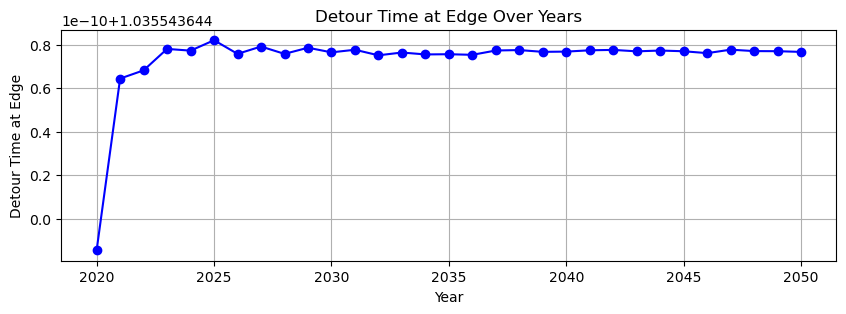

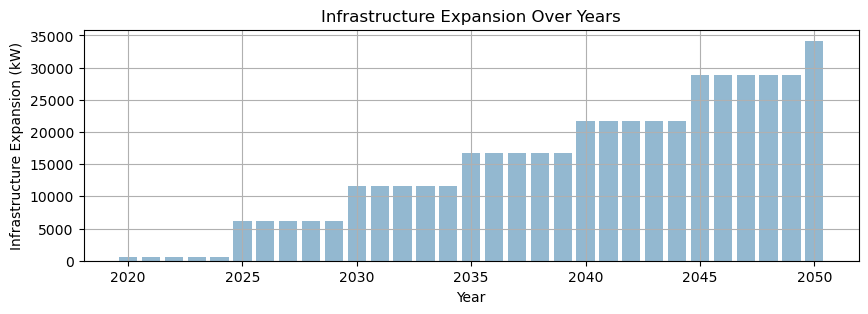

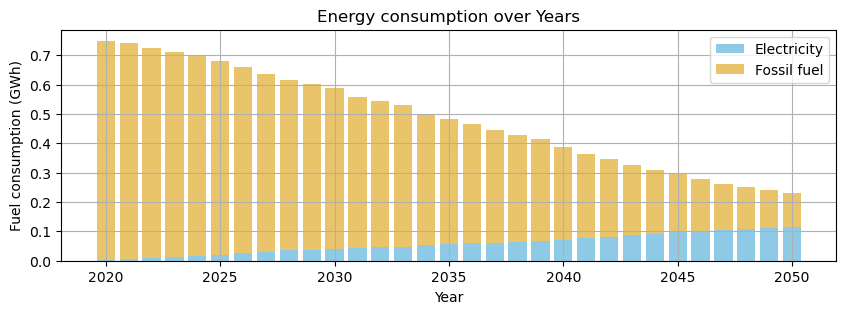

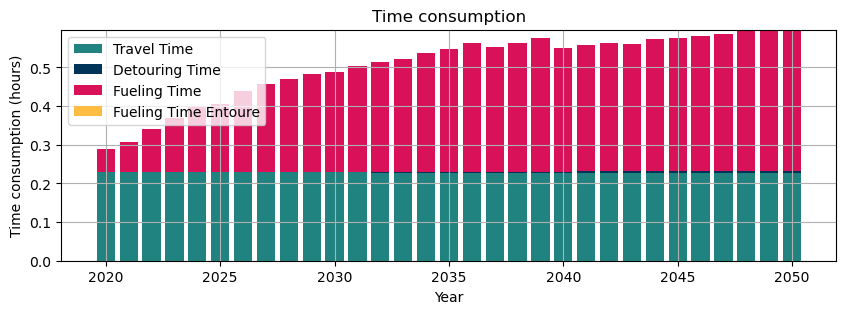

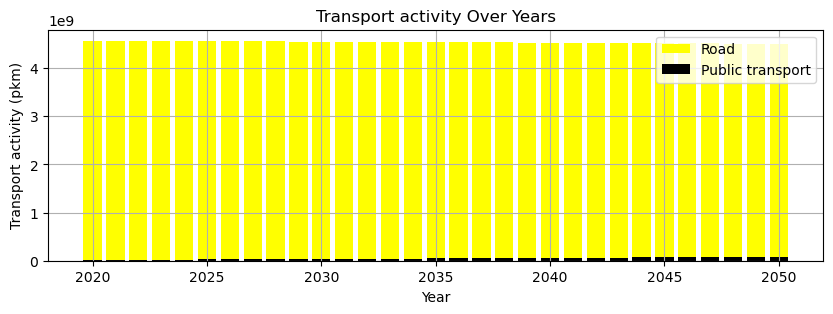

{('cs_2025-04-03_11-11-55', 2040, 0): 79.86374065256042, ('cs_2025-04-03_11-11-55', 2040, 1): 60.103647969598285, ('cs_2025-04-03_11-11-55', 2040, 2): 44.444616579481796, ('cs_2025-04-03_11-11-55', 2040, 3): 8.969700509753945, ('cs_2025-04-03_11-11-55', 2040, 4): 5.21226217609426, ('cs_2025-04-03_11-11-55', 2040, 5): 32.11923006592271}


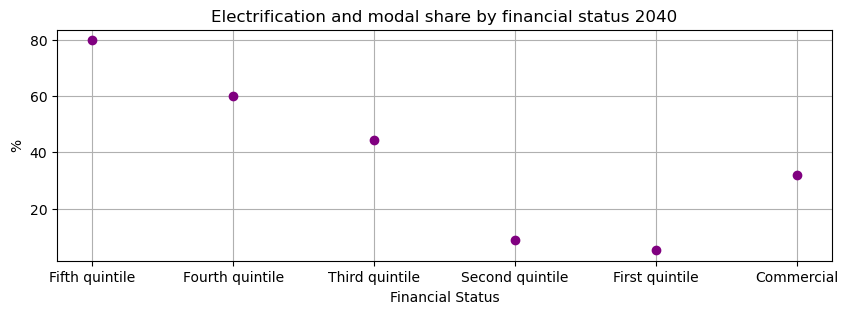

[1.0355436440486774, 1.035543644064254, 1.0355436440742074, 1.0355436440794212, 1.0355436440765877, 0.79932807115228, 0.7993280711544899, 0.7993280711561103, 0.7993280711534493, 0.799328071153691, 0.7993280711534544, 0.7993280711522798, 0.7993280711518412, 0.7993280711537375, 0.799328071153188, 0.7993280711545703, 0.7993280711523038, 0.7993280711531779, 0.7993280711522169, 0.7993280711526888, 0.7993280711522266, 0.7993280711533383, 0.7993280711524728, 0.7993280711523604, 0.7993280711521997, 0.7993280711520316, 0.7993280711522043, 0.7993280711515102, 0.7993280711520262, 0.7993280711548694, 1.0355436440771477]
31 31


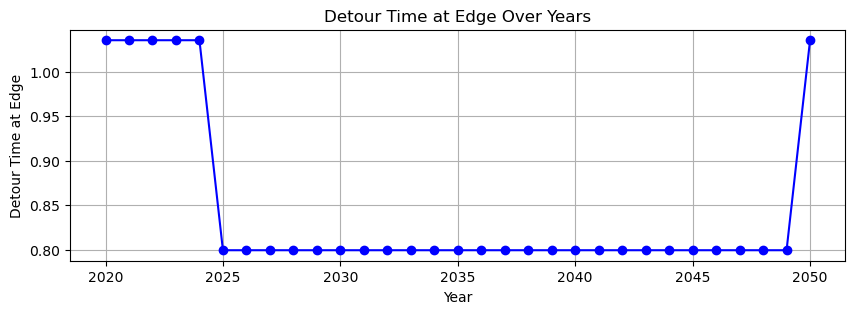

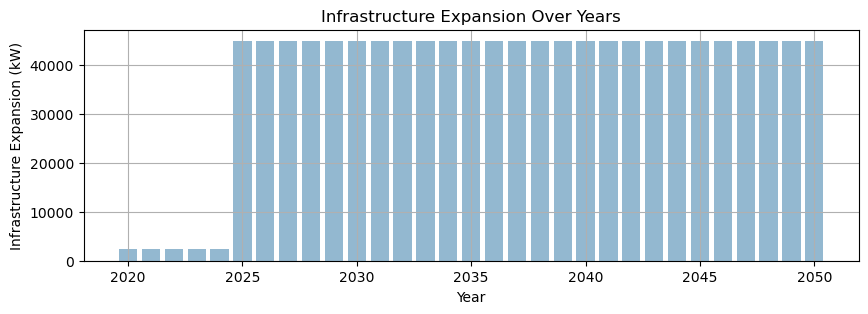

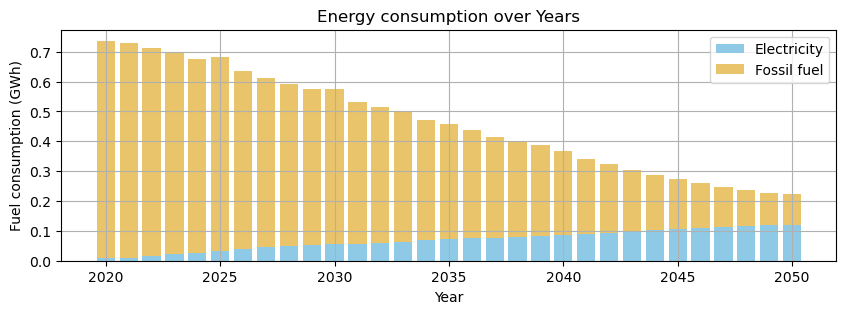

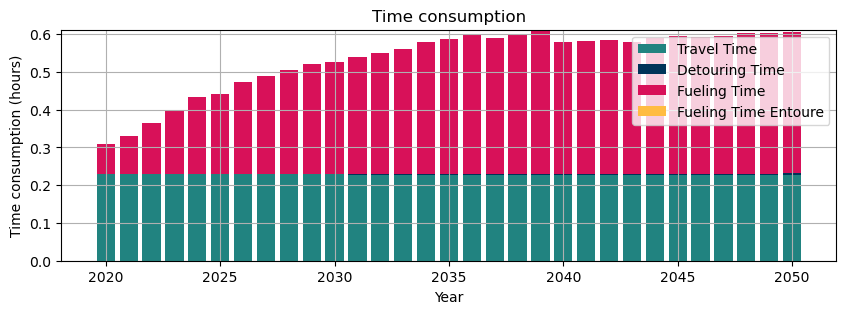

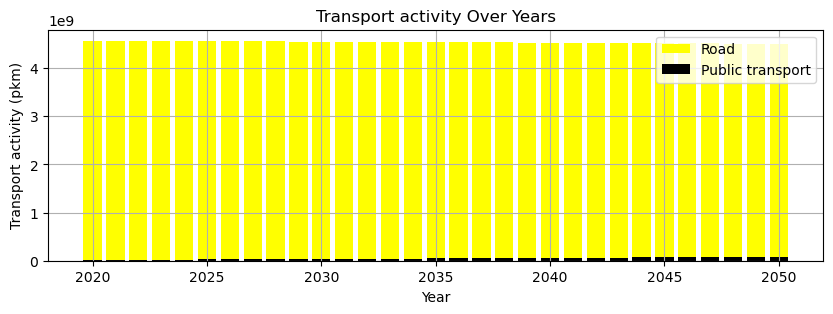

{('cs_2025-04-03_11-23-29', 2040, 0): 86.06184431051979, ('cs_2025-04-03_11-23-29', 2040, 1): 73.07764538730098, ('cs_2025-04-03_11-23-29', 2040, 2): 57.73655258889702, ('cs_2025-04-03_11-23-29', 2040, 3): 12.161604258943346, ('cs_2025-04-03_11-23-29', 2040, 4): 5.21226217609426, ('cs_2025-04-03_11-23-29', 2040, 5): 32.543452234841986}


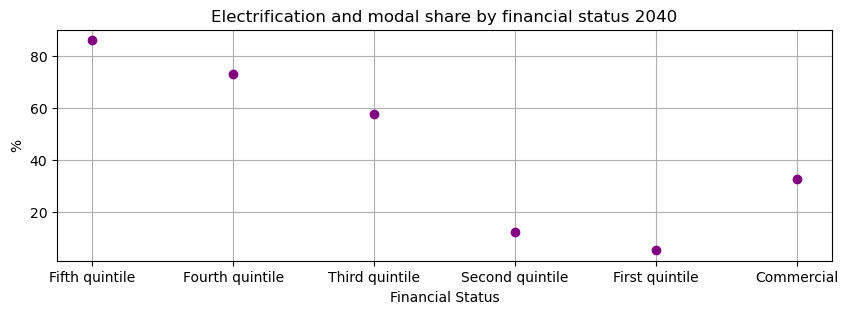

[0.5219733795853567, 0.521973379609547, 0.5219733795941282, 0.5219733796092475, 0.5219733796083865, 0.5219733796082192, 0.5219733796031639, 0.5219733796039684, 0.5219733796077088, 0.5219733796065861, 0.40052426117515744, 0.40052426117673123, 0.4005242611783172, 0.40052426117736245, 0.4005242611779526, 0.5219733796045589, 0.5219733796063928, 0.5219733796067002, 0.5219733796068062, 0.5219733796055473, 0.5219733796043936, 0.5219733796069015, 0.5219733796065489, 0.5219733796053175, 0.5219733796067273, 0.40052426117954837, 0.40052426117840867, 0.40052426117881335, 0.4005242611786452, 0.4005242611775622, 0.5219733796070269]
31 31


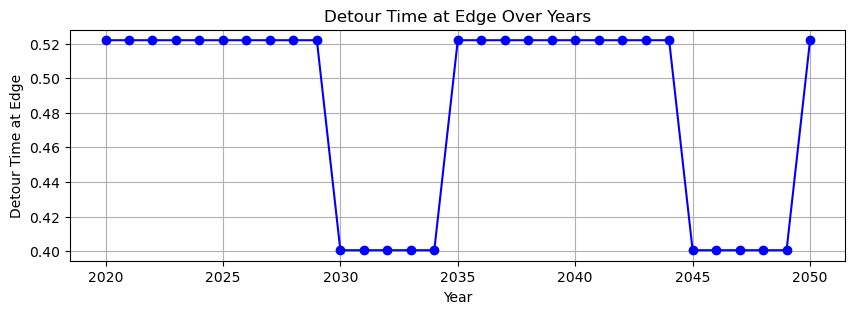

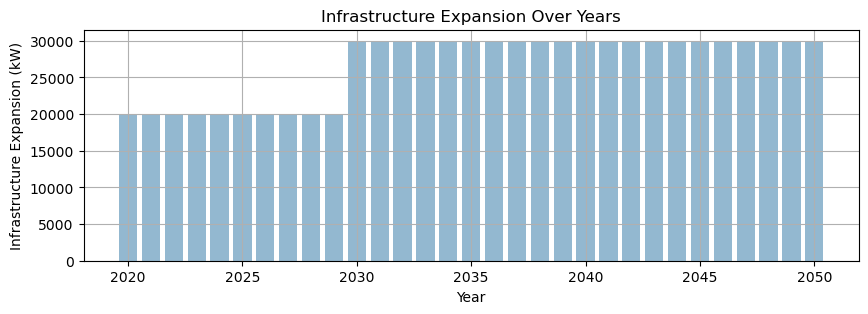

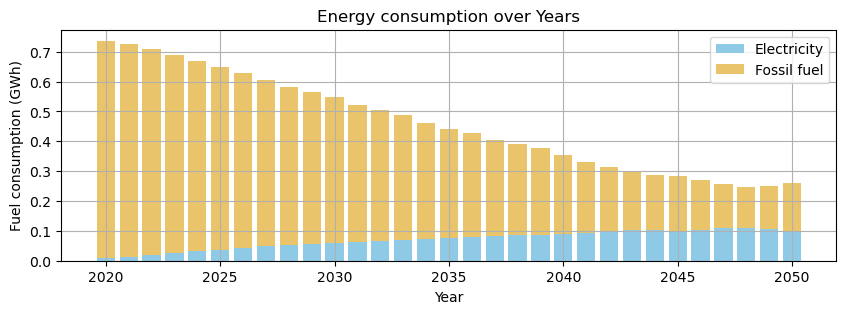

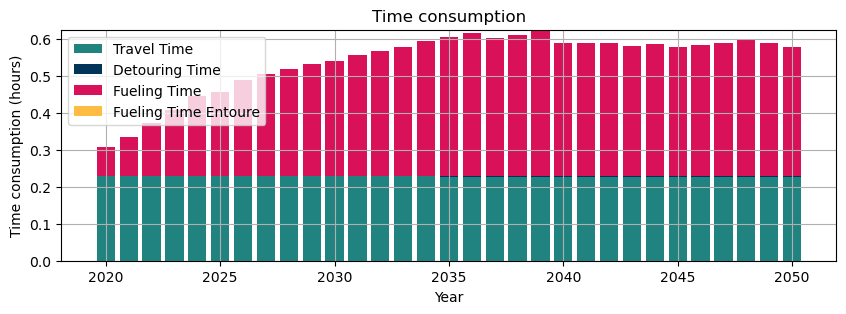

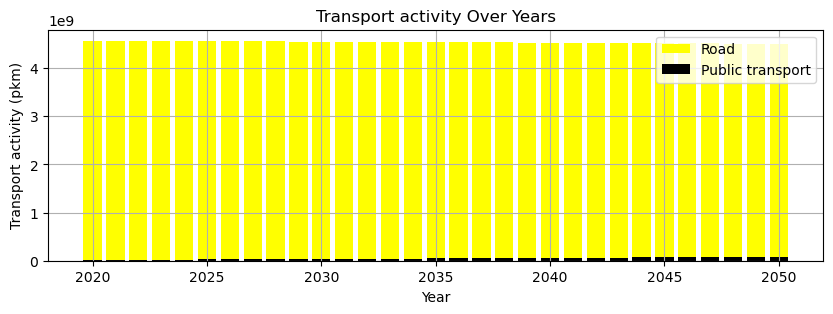

{('cs_2025-04-03_09-52-20', 2040, 0): 86.06184430885801, ('cs_2025-04-03_09-52-20', 2040, 1): 78.7419719665425, ('cs_2025-04-03_09-52-20', 2040, 2): 64.43266956391004, ('cs_2025-04-03_09-52-20', 2040, 3): 12.237256627971686, ('cs_2025-04-03_09-52-20', 2040, 4): 5.212262175783544, ('cs_2025-04-03_09-52-20', 2040, 5): 32.54345223165592}


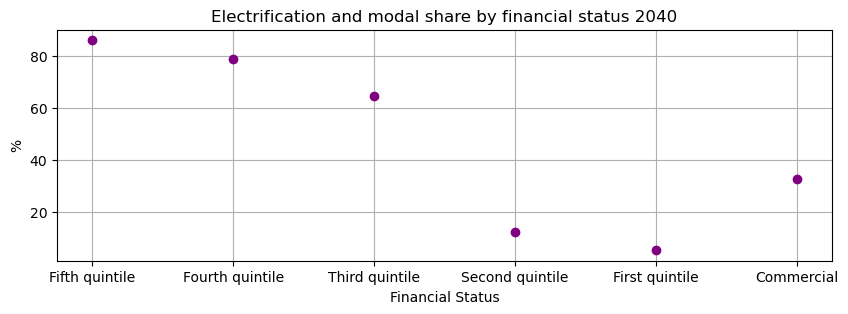

In [156]:
current_path = os.getcwd()
Y_disp = 2040
total_F = sum(odpair_list_dict[r]["F"][0] for r in odpair_list_dict.keys())
print(total_F)
file_results = os.path.normpath(current_path + "/results")
for case_study_name in case_studies:
    # case_study_name = case_studies[0]
    years = range(min([item[1] for item in list(detour_times_at_edge.keys())]), max([item[1] for item in list(detour_times_at_edge.keys())]) + 1) 
    
    detour_times_filtered = [detour_times_at_edge[el] for el in detour_times_at_edge.keys() if el[0] == case_study_name]
    print(detour_times_filtered)
    detour_times_filtered = {k: v for k, v in detour_times_at_edge.items() if k[0] == case_study_name}
    detour_times = list(detour_times_filtered.values())
    print(len(detour_times), len(years))
    plt.figure(figsize=(10, 3))
    plt.plot(years, detour_times, marker='o', linestyle='-', color='b')
    plt.xlabel('Year')
    plt.ylabel('Detour Time at Edge')
    plt.title('Detour Time at Edge Over Years')
    plt.grid(True)
    plt.show()

    infrastructure_expansion_filtered = {k: v for k, v in infrastructure_expansion.items() if k[0] == case_study_name}
    infrastructure_expansion_values = list(infrastructure_expansion_filtered.values())

    plt.figure(figsize=(10, 3))
    plt.bar(years, infrastructure_expansion_values, color='#669bbc', alpha=0.7)
    plt.xlabel('Year')
    plt.ylabel('Infrastructure Expansion (kW)')
    plt.title('Infrastructure Expansion Over Years')
    plt.grid(True)
    plt.savefig(os.path.normpath(file_results + "/" + case_study_name + "infr_inv.png"), transparent=True)
    plt.show()


    fueled_energy_filtered = {k: v for k, v in fueled_energy.items() if k[0] == case_study_name}
    fueled_energy_values = [item * 10 ** (-9) for item in list(fueled_energy_filtered.values())]
    fueled_other_energy_filtered = {k: v for k, v in fueled_other_energy.items() if k[0] == case_study_name}
    fueled_other_energy_values = [item * 10 ** (-9) for item in list(fueled_other_energy_filtered.values())]

    plt.figure(figsize=(10, 3))
    plt.bar(years, fueled_energy_values, color='#8ecae6', label='Electricity')
    plt.bar(years, fueled_other_energy_values, bottom=fueled_energy_values, color='#e9c46a', label='Fossil fuel')
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Fuel consumption (GWh)')
    plt.title('Energy consumption over Years')
    plt.grid(True)
    plt.savefig(os.path.normpath(file_results + "/" + case_study_name + "energ_cons.png"), transparent=True)
    plt.show()


    # time consumption for each scenario 
    # detour_times_filtered = {k: v for k, v in detour_times_by_fuel.items() if k[0] == case_study_name}
    travel_times_T_filtered = {k: v for k, v in travel_times_T.items() if k[0] == case_study_name}
    detouring_times_T_filtered = {k: v for k, v in detouring_times_T.items() if k[0] == case_study_name}
    fueling_times_T_filtered = {k: v for k, v in fueling_times_T.items() if k[0] == case_study_name}
    waiting_time_T_filtered = {k: v for k, v in waiting_time_T.items() if k[0] == case_study_name}
    fueling_times_entoure_T_filtered = {k: v for k, v in fueling_times_entoure_T.items() if k[0] == case_study_name}

    values_yearly_travel_time = [sum(travel_times_T_filtered[(case_study_name, y, fs)]/total_F for fs in financial_status_dict.keys()) for y in years]
    values_yearly_detouring_time = [sum(detouring_times_T_filtered[(case_study_name, y, fs)]/total_F for fs in financial_status_dict.keys()) for y in years]
    values_yearly_fueling_time = [sum(fueling_times_T_filtered[(case_study_name, y, fs)]/total_F for fs in financial_status_dict.keys()) for y in years]
    values_yearly_waiting_time = [sum(waiting_time_T_filtered[(case_study_name, y, fs)]/total_F for fs in financial_status_dict.keys()) for y in years]
    values_yearly_fueling_times_entoure = [sum(fueling_times_entoure_T_filtered[(case_study_name, y, fs)]/total_F for fs in financial_status_dict.keys()) for y in years]

    plt.figure(figsize=(10, 3))
    plt.bar(years, values_yearly_travel_time, color='#218380', label='Travel Time')
    plt.bar(years, values_yearly_detouring_time, bottom=values_yearly_travel_time, color='#003459', label='Detouring Time')
    plt.bar(years, values_yearly_fueling_time, bottom=[sum(x) for x in zip(values_yearly_travel_time, values_yearly_detouring_time)], color='#d81159', label='Fueling Time')
    plt.bar(years, values_yearly_fueling_times_entoure, bottom=[sum(x) for x in zip(values_yearly_travel_time, values_yearly_detouring_time, values_yearly_fueling_time)], color='#ffbc42', label='Fueling Time Entoure')
    # plt.bar(years, values_yearly_waiting_time, bottom=[sum(x) for x in zip(values_yearly_travel_time, values_yearly_detouring_time, values_yearly_fueling_time)], color='yellow', label='Waiting Time')
    plt.xlabel('Year')
    plt.ylabel('Time consumption (hours)')
    plt.title('Time consumption')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.normpath(file_results + "/" + case_study_name + "time_cons.png"), transparent=True)
    plt.show()


    filtered_mode_shift = {k: v for k, v in mode_shift.items() if k[0] == case_study_name}
    mode_1_values = [mode_shift[key] for key in list(filtered_mode_shift.keys()) if key[2] == 1]
    mode_2_values = [mode_shift[key] for key in list(filtered_mode_shift.keys()) if key[2] == 2]

    plt.figure(figsize=(10, 3))
    plt.bar(years, mode_1_values, color='yellow', label='Road')
    plt.bar(years, mode_2_values, bottom=fueled_energy_values, color='black', label='Public transport')
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Transport activity (pkm)')
    plt.title('Transport activity Over Years')
    plt.grid(True)
    plt.savefig(os.path.normpath(file_results + "/" + case_study_name + "Transport_activity.png"), transparent=True)
    plt.show()

    financial_statuses = [financial_status_dict[fs]["name"] for fs in financial_status_dict.keys()]
    total_h_fs_share_filtered = {k: v for k, v in total_h_fs_share.items() if k[0] == case_study_name and k[1] == Y_disp}
    print(total_h_fs_share_filtered)
    total_h_fs_share_values = [total_h_fs_share_filtered[(case_study_name, Y_disp, fs)] for fs in financial_status_dict.keys()]

    modal_shift_split_fs_filtered = {k: v for k, v in modal_shift_split_fs.items() if k[0] == case_study_name and k[1] == Y_disp}
    modal_shift_split_fs_values = [modal_shift_split_fs_filtered[(case_study_name, Y_disp, fs)] for fs in financial_status_dict.keys()]

    plt.figure(figsize=(10, 3))
    plt.grid(True, zorder=0)
    plt.scatter(financial_statuses, total_h_fs_share_values, color='purple', zorder=3, label='Battery-electric vehicles (%)')
    # plt.scatter(financial_statuses, modal_shift_split_fs_values, color='orange', zorder=3, label='Modal Share Road (%)')
    plt.xlabel('Financial Status')
    plt.ylabel('%')
    plt.title('Electrification and modal share by financial status ' + str(Y_disp))
    plt.savefig(os.path.normpath(file_results + "/" + case_study_name + "elect_mode.png"), transparent=True)

    plt.show()



{('cs_2025-04-03_11-11-55', 2040, 0): 79.86374065256042, ('cs_2025-04-03_11-11-55', 2040, 1): 60.103647969598285, ('cs_2025-04-03_11-11-55', 2040, 2): 44.444616579481796, ('cs_2025-04-03_11-11-55', 2040, 3): 8.969700509753945, ('cs_2025-04-03_11-11-55', 2040, 4): 5.21226217609426, ('cs_2025-04-03_11-11-55', 2040, 5): 32.11923006592271}
{('cs_2025-04-03_11-23-29', 2040, 0): 86.06184431051979, ('cs_2025-04-03_11-23-29', 2040, 1): 73.07764538730098, ('cs_2025-04-03_11-23-29', 2040, 2): 57.73655258889702, ('cs_2025-04-03_11-23-29', 2040, 3): 12.161604258943346, ('cs_2025-04-03_11-23-29', 2040, 4): 5.21226217609426, ('cs_2025-04-03_11-23-29', 2040, 5): 32.543452234841986}
{('cs_2025-04-03_09-52-20', 2040, 0): 86.06184430885801, ('cs_2025-04-03_09-52-20', 2040, 1): 78.7419719665425, ('cs_2025-04-03_09-52-20', 2040, 2): 64.43266956391004, ('cs_2025-04-03_09-52-20', 2040, 3): 12.237256627971686, ('cs_2025-04-03_09-52-20', 2040, 4): 5.212262175783544, ('cs_2025-04-03_09-52-20', 2040, 5): 32.543

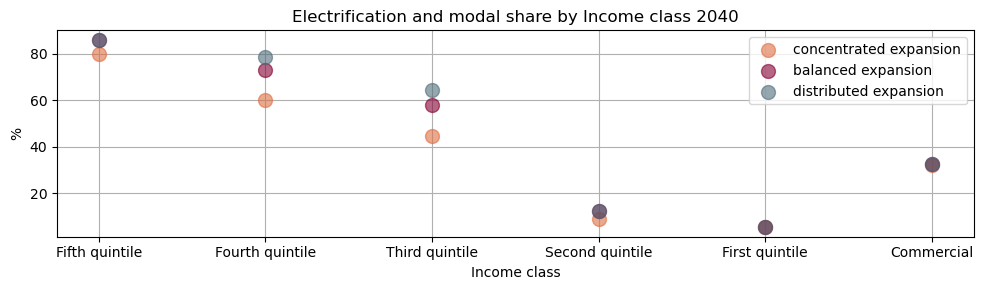

In [137]:
colors={'distributed expansion':'#4f6d7a', 'concentrated expansion': '#dd6e42', 'balanced expansion':'#840032'}
lables={'cs_2025-04-03_09-52-20':'distributed expansion', 'cs_2025-04-03_11-11-55':'concentrated expansion', 'cs_2025-04-03_11-23-29':'balanced expansion'}

lables_reversed = {v: k for k, v in lables.items()}
plt.figure(figsize=(10, 3))
plt.grid(True, zorder=0)
for case_study_name in case_studies:
    # case_study_name = case_studies[0]
    years = range(min([item[1] for item in list(detour_times_at_edge.keys())]), max([item[1] for item in list(detour_times_at_edge.keys())]) + 1) 
    financial_statuses = [financial_status_dict[fs]["name"] for fs in financial_status_dict.keys()]
    total_h_fs_share_filtered = {k: v for k, v in total_h_fs_share.items() if k[0] == case_study_name and k[1] == Y_disp}
    print(total_h_fs_share_filtered)
    total_h_fs_share_values = [total_h_fs_share_filtered[(case_study_name, Y_disp, fs)] for fs in financial_status_dict.keys()]

    modal_shift_split_fs_filtered = {k: v for k, v in modal_shift_split_fs.items() if k[0] == case_study_name and k[1] == Y_disp}
    modal_shift_split_fs_values = [modal_shift_split_fs_filtered[(case_study_name, Y_disp, fs)] for fs in financial_status_dict.keys()]

    case_study_name_string = lables[case_study_name]
    plt.scatter(financial_statuses, total_h_fs_share_values, color=colors[case_study_name_string], zorder=3, label=case_study_name_string, alpha=0.6, s=100)
    # plt.scatter(financial_statuses, modal_shift_split_fs_values, color='orange', zorder=3, label='Modal Share Road (%)')
plt.xlabel('Income class')
plt.ylabel('%')
plt.legend()
plt.title('Electrification and modal share by Income class ' + str(Y_disp))
plt.tight_layout()
plt.savefig(os.path.normpath(file_results + "/" + case_study_name + "elect_mode.png"), transparent=True)
plt.show()


In [138]:
# calculate co2 emissions
fuel_list_dict_name = {item["name"]: item for item in fuel_list}
def co2_emissions(case_study_name):
    co2_emissions_dic = {}
    # s = case_study_output[case_study_name]["s"]
    for y in range(y_init, Y_end + 1):
        co2_emissions_dic[y] = fueled_other_energy[(case_study_name, y)] * fuel_list_dict_name[fuel_list_dict[1]["name"]]["emission_factor"][y-y_init]
        # co2_emissions_dic[y] = 0
        # for r in odpair_list_dict.keys():
        #     if geom_id in path_list_dict[odpair_list_dict[r]["path_id"]]["sequence"]:
        #         #co2_emissions_dic[y] += sum([s[(y, (1, r, odpair_list[r]["path_id"], geom_id), tv)] * fuel_list_dict_name[technology_list_dict[technology_list_dict[techvehicle_list_dict[tv]["technology"]]["id"]]["fuel"]]["emission_factor"][y-y_init] for r in odpair_list_dict.keys() for tv in techvehicle_list_dict.keys() if (y, (1, r, odpair_list[r]["path_id"], geom_id), tv) in s.keys() and technology_list_dict[techvehicle_list_dict[tv]["technology"]]["fuel"] == fuel_list_dict[1]["name"]])
        #         co2_emissions_dic[y] += 
    return co2_emissions_dic
    

In [139]:
co2_emissions_yearly = {}
for case_study_name in case_studies:
    co2_emissions_yearly[case_study_name] = co2_emissions(case_study_name)

{'cs_2025-04-03_11-11-55': {2020: 199243795544.86078, 2021: 196257404380.97455, 2022: 190771820604.3252, 2023: 185503782633.78867, 2024: 181142894674.35944, 2025: 175636031343.07806, 2026: 169048107135.15277, 2027: 161301538330.31592, 2028: 155063574541.81625, 2029: 150649144493.1378, 2030: 146231606833.12048, 2031: 137298733226.79202, 2032: 132686006791.65431, 2033: 128236156103.31519, 2034: 119693932203.67935, 2035: 113515437237.15417, 2036: 108268438945.28777, 2037: 102201806261.90971, 2038: 97224438526.1104, 2039: 92004459822.80829, 2040: 84070738819.39987, 2041: 76225382993.84035, 2042: 70049587272.23524, 2043: 63465603452.55379, 2044: 57713119706.32949, 2045: 52672494026.841774, 2046: 47279250740.652565, 2047: 42104442669.82134, 2048: 37932483348.93622, 2049: 34320730446.236515, 2050: 30830148029.93432}, 'cs_2025-04-03_11-23-29': {2020: 194161483548.59305, 2021: 191282558885.0052, 2022: 185616470539.03442, 2023: 179163900656.1688, 2024: 172735296017.67148, 2025: 173179992970.2185

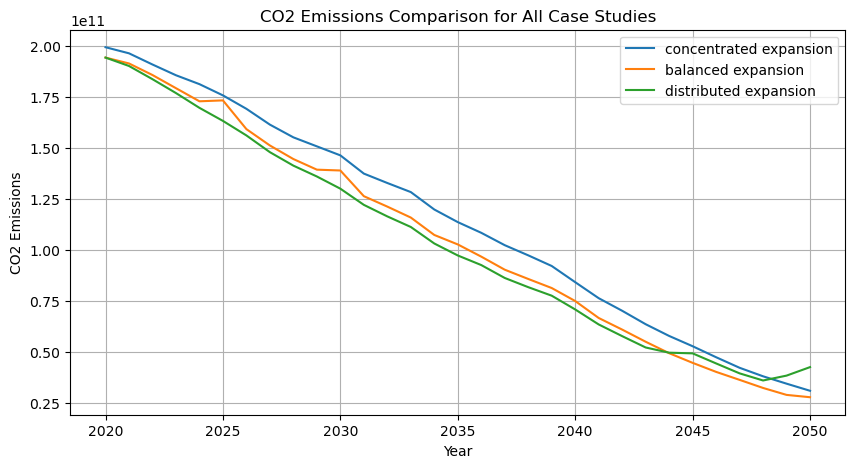

In [140]:
print(co2_emissions_yearly)
colors={'distributed expansion':'#4f6d7a', 'concentrated expansion': '#dd6e42', 'balanced expansion':'#840032'}
lables={'cs_2025-04-03_09-52-20':'distributed expansion', 'cs_2025-04-03_11-11-55':'concentrated expansion', 'cs_2025-04-03_11-23-29':'balanced expansion'}

plt.figure(figsize=(10, 5))
for case_study_name in case_studies:
    years = co2_emissions_yearly[case_study_name].keys()
    emissions = co2_emissions_yearly[case_study_name].values()
    plt.plot(years, emissions, label=lables[case_study_name])
    print(lables[case_study_name], sum(emissions))
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions Comparison for All Case Studies')
plt.legend()
plt.grid(True)
plt.show()

In [141]:
colors={'distributed expansion':'#4f6d7a', 'concentrated expansion': '#dd6e42', 'balanced expansion':'#840032'}
lables={'cs_2025-04-03_09-52-20':'distributed expansion', 'cs_2025-04-03_11-11-55':'concentrated expansion', 'cs_2025-04-03_11-23-29':'balanced expansion'}


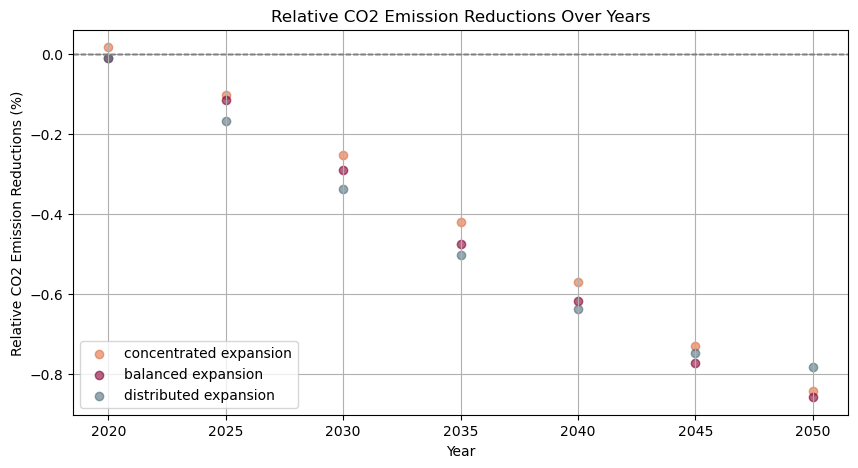

In [142]:
initial_co2_emissions = np.mean([co2_emissions_yearly[case_study_name][y_init] for case_study_name in case_studies])

relative_reductions = {}
for case_study_name in case_studies:
    reductions_by_case_study = {}
    for y in range(y_init, Y_end + 1, 5):
        reductions_by_case_study[y] =- (initial_co2_emissions - co2_emissions_yearly[case_study_name][y])/initial_co2_emissions
    relative_reductions[case_study_name] = reductions_by_case_study


plt.figure(figsize=(10, 5))
for case_study_name in case_studies:
    years = list(relative_reductions[case_study_name].keys())
    reductions = list(relative_reductions[case_study_name].values())
    plt.scatter(years, reductions, color=colors[lables[case_study_name]], label=lables[case_study_name], alpha=0.6)
    plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Year')
plt.ylabel('Relative CO2 Emission Reductions (%)')
plt.title('Relative CO2 Emission Reductions Over Years')
plt.legend()
plt.grid(True)
plt.show()

In [143]:
# costs for infrastructure

def infrastructure_costs(case_study_name):
    fueling_inf_costs = {}
    om_costs = fuel_list_dict[fuel_id]["fueling_infrastructure_om_costs"]
    inv_costs = fuel_list_dict[fuel_id]["cost_per_kW"]
    q_fuel_infr_plus = case_study_output[case_study_name]["q_fuel_infr_plus"]
    total_check = 0
    for y in range(y_init, Y_end + 1):
        q_fuel_infr_plus_added_since_0 = sum(q_fuel_infr_plus[(y0, fuel_id, geom_id)] for y0 in np.arange(y_init, y+1, investment_period) if (y0, fuel_id, geom_id) in q_fuel_infr_plus.keys())
        if y == Y_end:
            total_check += q_fuel_infr_plus_added_since_0
        if y in range(y_init, Y_end + 1, investment_period):
            q_fuel_infr_plus_added_y = q_fuel_infr_plus[(y, fuel_id, geom_id)]
        else: 
            q_fuel_infr_plus_added_y = 0
        costs = q_fuel_infr_plus_added_since_0 * om_costs[y-y_init] + q_fuel_infr_plus_added_y * inv_costs[y-y_init]
        fueling_inf_costs[y] = costs
        # print(total_check)
        # print("total end charging infrastructure costs", costs)
    return costs



In [144]:
fuel_infrastructure_costs = {}
co2_reduction_effectivness = {}
objective_values = {'distributed expansion':6.723108632145e+13, 'concentrated expansion': 6.723230516850e+13, 'balanced expansion':6.723214759006e+13}
lables_reversed = {v: k for k, v in lables.items()}
for case_study_name in case_studies:
    fuel_infrastructure_costs[case_study_name] = infrastructure_costs(case_study_name)
    total_co2_reduction = sum(initial_co2_emissions - co2_emissions_yearly[case_study_name][y] for y in range(y_init, Y_end + 1))
    co2_reduction_effectivness[case_study_name] = total_co2_reduction/(objective_values[lables[case_study_name]] - fuel_infrastructure_costs[case_study_name])
    print(lables[case_study_name], sum([co2_emissions_yearly[case_study_name][y] for y in range(y_init, Y_end + 1)])/ (18290702896 * 30), total_co2_reduction, fuel_infrastructure_costs[case_study_name], co2_reduction_effectivness[case_study_name], "CO2 reduction per euro")
print(fuel_infrastructure_costs)
print(co2_reduction_effectivness)
# print((co2_reduction_effectivness[lables_reversed["concentrated expansion"]] - co2_reduction_effectivness[lables_reversed["distributed expansion"]])/co2_reduction_effectivness[lables_reversed["concentrated expansion"]])

concentrated expansion 6.448892116140398 2532880122827.3926 5260373.516 0.03767356056967552 CO2 reduction per euro
balanced expansion 5.961353402810041 2800402895502.103 4500000.0 0.04165273880606271 CO2 reduction per euro
distributed expansion 5.864302204880778 2853656934312.855 3000000.0 0.042445499809496585 CO2 reduction per euro
{'cs_2025-04-03_11-11-55': 5260373.516, 'cs_2025-04-03_11-23-29': 4500000.0, 'cs_2025-04-03_09-52-20': 3000000.0}
{'cs_2025-04-03_11-11-55': np.float64(0.03767356056967552), 'cs_2025-04-03_11-23-29': np.float64(0.04165273880606271), 'cs_2025-04-03_09-52-20': np.float64(0.042445499809496585)}


In [145]:
lables={'cs_2025-03-12_18-28-31':'Slow densification', 'cs_2025-03-12_17-20-00':'Rapid denisification'}

In [146]:
print(co2_emissions_yearly)


{'cs_2025-04-03_11-11-55': {2020: 199243795544.86078, 2021: 196257404380.97455, 2022: 190771820604.3252, 2023: 185503782633.78867, 2024: 181142894674.35944, 2025: 175636031343.07806, 2026: 169048107135.15277, 2027: 161301538330.31592, 2028: 155063574541.81625, 2029: 150649144493.1378, 2030: 146231606833.12048, 2031: 137298733226.79202, 2032: 132686006791.65431, 2033: 128236156103.31519, 2034: 119693932203.67935, 2035: 113515437237.15417, 2036: 108268438945.28777, 2037: 102201806261.90971, 2038: 97224438526.1104, 2039: 92004459822.80829, 2040: 84070738819.39987, 2041: 76225382993.84035, 2042: 70049587272.23524, 2043: 63465603452.55379, 2044: 57713119706.32949, 2045: 52672494026.841774, 2046: 47279250740.652565, 2047: 42104442669.82134, 2048: 37932483348.93622, 2049: 34320730446.236515, 2050: 30830148029.93432}, 'cs_2025-04-03_11-23-29': {2020: 194161483548.59305, 2021: 191282558885.0052, 2022: 185616470539.03442, 2023: 179163900656.1688, 2024: 172735296017.67148, 2025: 173179992970.2185

In [147]:
# define a base case scenario 

In [148]:
# comparison of nb of bevs per
colors={'distributed expansion':'#4f6d7a', 'concentrated expansion': '#dd6e42', 'balanced expansion':'#840032'}
lables={'cs_2025-04-03_09-52-20':'distributed expansion', 'cs_2025-04-03_11-11-55':'concentrated expansion', 'cs_2025-04-03_11-23-29':'balanced expansion'}

for fs in financial_status_dict.keys():
    total_fossil_fuel = {}
    for case_study in case_studies:
        total_bevs = 0
        total_energy_fueled = 0
        total_fossil_fueled = 0
        for y in range(y_init, Y_end + 1):
            total_bevs += total_h_fs[(case_study, y, fs)]
            total_energy_fueled += fueled_energy_fossil[(case_study, y, fs)]
        total_fossil_fueled += fueled_other_energy[(case_study, y)]
        print(fs, case_study, lables[case_study], total_bevs)
        print(fs, case_study, lables[case_study], total_energy_fueled)
        total_fossil_fuel[case_study] = total_fossil_fueled
        print("\n")

    print("\n")
print(total_fossil_fuel)

0 cs_2025-04-03_11-11-55 concentrated expansion 310507.39723400003
0 cs_2025-04-03_11-11-55 concentrated expansion 1521524312.10869


0 cs_2025-04-03_11-23-29 balanced expansion 344428.2726859999
0 cs_2025-04-03_11-23-29 balanced expansion 1292388808.0835328


0 cs_2025-04-03_09-52-20 distributed expansion 329245.85354400007
0 cs_2025-04-03_09-52-20 distributed expansion 1370527445.933487




1 cs_2025-04-03_11-11-55 concentrated expansion 222721.306525
1 cs_2025-04-03_11-11-55 concentrated expansion 2181044703.4243765


1 cs_2025-04-03_11-23-29 balanced expansion 278027.72267399996
1 cs_2025-04-03_11-23-29 balanced expansion 1832918740.6764061


1 cs_2025-04-03_09-52-20 distributed expansion 292964.378859
1 cs_2025-04-03_09-52-20 distributed expansion 1712926874.245779




2 cs_2025-04-03_11-11-55 concentrated expansion 169948.68402500002
2 cs_2025-04-03_11-11-55 concentrated expansion 2557501612.702657


2 cs_2025-04-03_11-23-29 balanced expansion 221036.40670199998
2 cs_2025-04-03_1

In [149]:
total_F = sum(odpair_list_dict[r]["F"][0] for r in odpair_list_dict.keys())
print(total_F)
for case_study in case_studies:
    for y in range(y_init, Y_end + 1, 5):
        total_travel_time = 0
        for fs in financial_status_dict.keys():
            total_travel_time += travel_times_per_fs[(case_study, y, fs)]

        print(lables[case_study], y, total_travel_time/total_F)
    print("\n")

462599516.0
concentrated expansion 2020 0.24050140559389635
concentrated expansion 2025 0.240161295341321
concentrated expansion 2030 0.2398038360477965
concentrated expansion 2035 0.2394281427376949
concentrated expansion 2040 0.23903328529321116
concentrated expansion 2045 0.2386182861504912
concentrated expansion 2050 0.2382710961212831


balanced expansion 2020 0.24050140559389635
balanced expansion 2025 0.24016129534132827
balanced expansion 2030 0.23980383604779762
balanced expansion 2035 0.23942814273770005
balanced expansion 2040 0.23903328529322182
balanced expansion 2045 0.23861828615048725
balanced expansion 2050 0.23827109612128416


distributed expansion 2020 0.24050140559389635
distributed expansion 2025 0.24016129534132424
distributed expansion 2030 0.23980383604778086
distributed expansion 2035 0.23942814273767704
distributed expansion 2040 0.23903328529321966
distributed expansion 2045 0.23861828615051237
distributed expansion 2050 0.23827109612129777




In [150]:
print([detouring_times_T[k]/total_F for k in detouring_times_T.keys()])

[0.000152364817884937, 0.000157232626745766, 0.00015723263828706642, 0.00015723263828706642, 0.00015723264982620518, 4.629491403964202e-05, 0.00023263867549528519, 0.00015611973635960312, 0.00015626753386183828, 0.00015633833279021417, 0.00015618363695391328, 7.076583587692297e-05, 0.00030856094988002537, 0.0002343899492601285, 0.00015473882273149634, 0.00015509786369945097, 0.00015500343681941941, 9.375812851477345e-05, 0.000379677196335415, 0.00023375283575739845, 0.00021502067035452757, 0.00015381716292586867, 0.00015432199844108785, 0.00011591105332673975, 0.0004475461663777444, 0.00023273051255202784, 0.00021298779023365863, 0.00015202018469902593, 0.0001520025742179981, 0.0001364561764846291, 0.0005074547255881694, 0.00030307528252580357, 0.0002100002226720877, 0.00015055372276048814, 0.00015046061564621266, 0.00015563019626246215, 0.0005684870366055463, 0.0003077791261891419, 0.0002660190885024618, 0.0002057831400433199, 0.0001497114887080859, 0.00017320631861837053, 0.000620372

cs_2025-04-03_11-11-55
(31, 56)
cs_2025-04-03_11-23-29
(31, 56)
cs_2025-04-03_09-52-20
(31, 56)


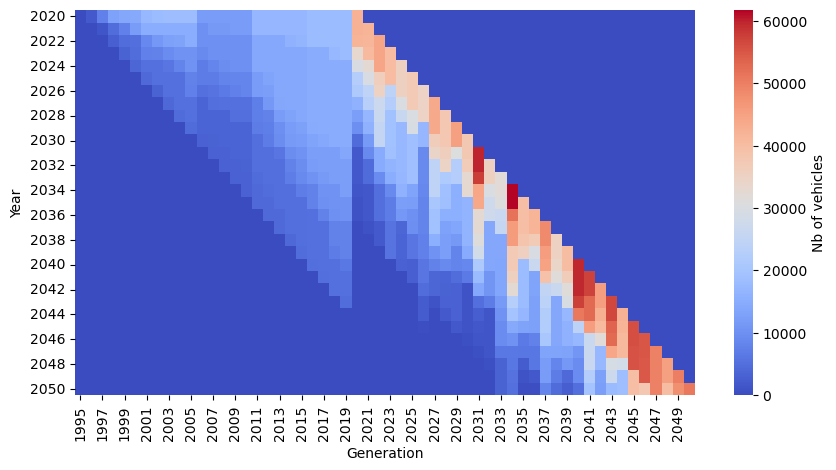

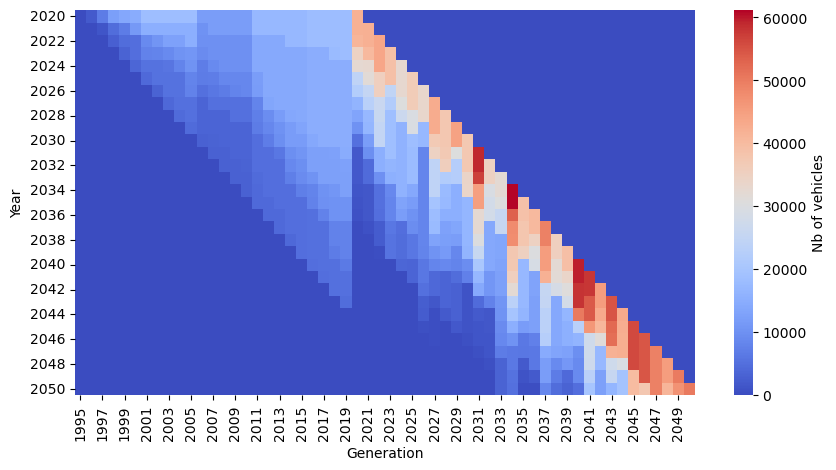

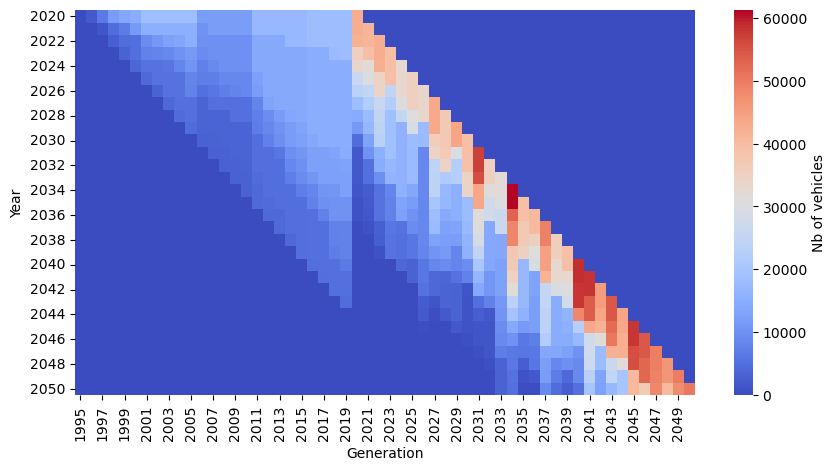

In [151]:

#creating colored matrix - with year x generation
import seaborn as sns
import pandas as pd
generations = range(g_init, Y_end + 1)
years = range(y_init, Y_end + 1)
for case_study_name in case_studies:
    print(case_study_name)
    data = []
    for y in range(y_init, Y_end + 1):
        generation_array = []
        h = case_study_output[case_study_name]["h"]
        for g in range(g_init, Y_end +1):
            if g <= y:
                h_sum = sum(h[(y, r, tv_id, g)] for r in odpair_list_dict.keys() for tv_id in techvehicle_list_dict.keys() if (y, r, tv_id, g) in h.keys())
                generation_array.append(h_sum)
            else:
                generation_array.append(0)

        data.append(generation_array)
    print(np.shape(data))
    df = pd.DataFrame(data, index=years, columns=generations)

    plt.figure(figsize=(10, 5))
    sns.heatmap(df, cmap='coolwarm', cbar_kws={'label': 'Nb of vehicles'})
    plt.xlabel('Generation')
    plt.ylabel('Year')
    plt.savefig(os.path.normpath(file_results + "/" + case_study_name + "_generation_matrix.png"), transparent=True)